In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt


# 2

## [25 points] Clustering

Clustering can be used to reveal structure between samples of data and assign group membership to similar groups of samples. This exercise will provide you with experience applying clustering algorithms and comparing these techniques on various datasets to experience the pros and cons of these approaches when the structure of the data being clustered varies. For this exercise, we'll explore clustering in two dimensions to make the results more tangible, but in practice these approaches can be applied to any number of dimensions.

*Note: For each set of plots across the five datasets, please create subplots within a single figure (for example, when applying DBSCAN - please show the clusters resulting from DBSCAN as a single figure with one subplot for each dataset). This will make comparison easier.*

**(a) Run K-means and choose the number of clusters**. Five datasets are provided for you below and the code to load them below.
- Scatterplot each dataset
- For each dataset run the k-means algorithm for values of $k$ ranging from 1 to 10 and for each plot the "elbow curve" where you plot dissimilarity in each case. Here, you can measure dissimilarity using the within-cluster sum-of-squares, which in sklean is known as "inertia" and can be accessed through the `inertia_` attribute of a fit KMeans class instance.
- For each dataset, where is the elbow in the curve of within-cluster sum-of-squares and why? Is the elbow always clearly visible? When it's not clear, you will have to use your judgment in terms of selecting a reasonable number of clusters for the data. *There are also other metrics you can use to explore to measure the quality of cluster fit (but do not have to for this assignment) including the silhouette score, the Calinski-Harabasz index, and the Davies-Bouldin, to name a few within sklearn alone. However, assessing the quality of fit without "preferred" cluster assignments to compare against (that is, in a truly unsupervised manner) is challenging because measuring cluster fit quality is typically poorly-defined and doesn't generalize across all types of inter- and intra-cluster variation.*
- Plot your clustered data (different color for each cluster assignment) for your best $k$-means fit determined from both the elbow curve and your judgment for each dataset and your inspection of the dataset.

**(b) Apply DBSCAN**. Vary the `eps` and `min_samples` parameters to get as close as you can to having the same number of clusters as your choices with K-means. In this case, the black points are points that were not assigned to clusters.

**(c) Apply Spectral Clustering**. Select the same number of clusters as selected by k-means.

**(d) Comment on the strengths and weaknesses of each approach**. In particular, mention: 
- Which technique worked "best" and "worst" (as defined by matching how human intuition would cluster the data) on each dataset?
- How much effort was required to get good clustering for each method (how much parameter tuning needed to be done)?

*Note: For these clustering plots in this question, do NOT include legends indicating cluster assignment; instead, just make sure the cluster assignments are clear from the plot (e.g. different colors for each cluster)*



Code is provided below for loading the datasets and for making plots with the clusters as distinct colors

In [57]:
################################
# Load the data
################################
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

# Create / load the datasets:
n_samples = 1500
X0, _ = make_blobs(n_samples=n_samples, centers=2, n_features=2, random_state=0)
X1, _ = make_blobs(n_samples=n_samples, centers=5, n_features=2, random_state=0)

random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, cluster_std=1.3)
transformation = [[0.6, -0.6], [-0.2, 0.8]]
X2 = np.dot(X, transformation)
X3, _ = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
X4, _ = make_moons(n_samples=n_samples, noise=.12)

X = [X0, X1, X2, X3, X4]
# The datasets are X[i], where i ranges from 0 to 4

In [4]:
################################
# Code to plot clusters
################################
def plot_cluster(ax, data, cluster_assignments):
    '''Plot two-dimensional data clusters
    
    Parameters
    ----------
    ax : matplotlib axis
        Axis to plot on
    data : list or numpy array of size [N x 2] 
        Clustered data
    cluster_assignments : list or numpy array [N]
        Cluster assignments for each point in data

    '''
    clusters = np.unique(cluster_assignments)
    n_clusters = len(clusters)
    for ca in clusters:
        kwargs = {}
        if ca == -1:
            # if samples are not assigned to a cluster (have a cluster assignment of -1, color them gray)
            kwargs = {'color':'gray'}
            n_clusters = n_clusters - 1
        ax.scatter(data[cluster_assignments==ca, 0], data[cluster_assignments==ca, 1],s=5,alpha=0.5, **kwargs)
        ax.set_xlabel('feature 1')
        ax.set_ylabel('feature 2')
        ax.set_title(f'No. Clusters = {n_clusters}')
        ax.axis('equal')

**(a) Run K-means and choose the number of clusters**. Five datasets are provided for you below and the code to load them below.
- Scatterplot each dataset
- For each dataset run the k-means algorithm for values of $k$ ranging from 1 to 10 and for each plot the "elbow curve" where you plot dissimilarity in each case. Here, you can measure dissimilarity using the within-cluster sum-of-squares, which in sklean is known as "inertia" and can be accessed through the `inertia_` attribute of a fit KMeans class instance.
- For each dataset, where is the elbow in the curve of within-cluster sum-of-squares and why? Is the elbow always clearly visible? When it's not clear, you will have to use your judgment in terms of selecting a reasonable number of clusters for the data. *There are also other metrics you can use to explore to measure the quality of cluster fit (but do not have to for this assignment) including the silhouette score, the Calinski-Harabasz index, and the Davies-Bouldin, to name a few within sklearn alone. However, assessing the quality of fit without "preferred" cluster assignments to compare against (that is, in a truly unsupervised manner) is challenging because measuring cluster fit quality is typically poorly-defined and doesn't generalize across all types of inter- and intra-cluster variation.*
- Plot your clustered data (different color for each cluster assignment) for your best $k$-means fit determined from both the elbow curve and your judgment for each dataset and your inspection of the dataset.

- Scatterplot each dataset

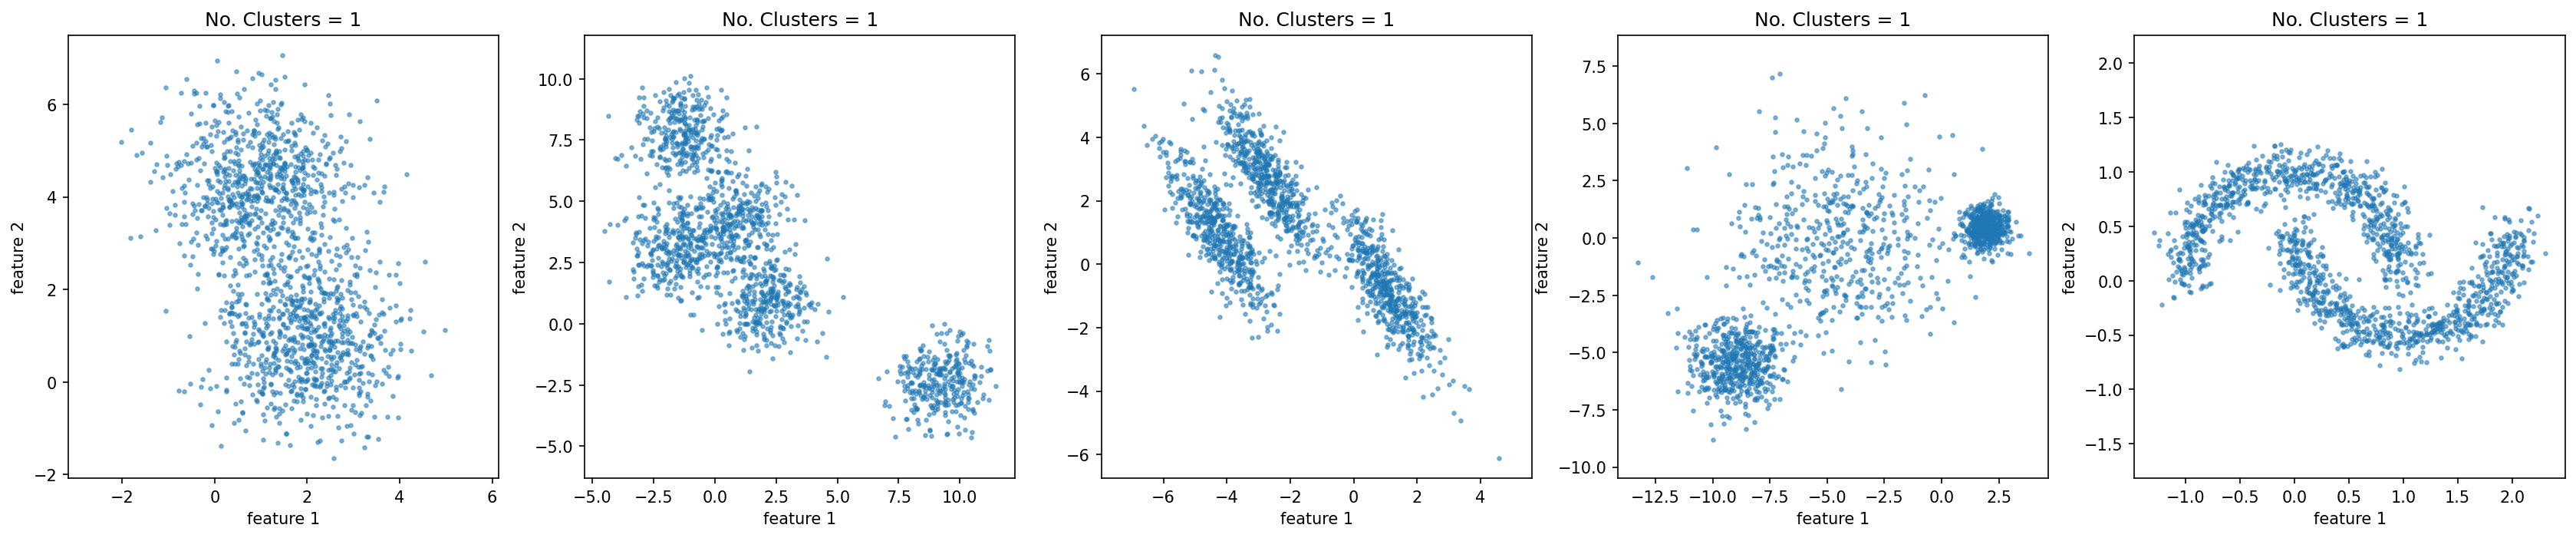

<Figure size 960x720 with 0 Axes>

In [7]:
#use matplotlib to scatter plot each dataset
#set the dpi of the plot to 150
 
plt.rcParams['figure.dpi'] = 150
fig, axes = plt.subplots(1, 5, figsize=(28, 5))
for i, ax in enumerate(axes):
    plot_cluster(ax, X[i], np.zeros(X[i].shape[0]))

plt.show()
plt.tight_layout()




- For each dataset run the k-means algorithm for values of $k$ ranging from 1 to 10 and for each plot the "elbow curve" where you plot dissimilarity in each case. Here, you can measure dissimilarity using the within-cluster sum-of-squares, which in sklean is known as "inertia" and can be accessed through the `inertia_` attribute of a fit KMeans class instance.

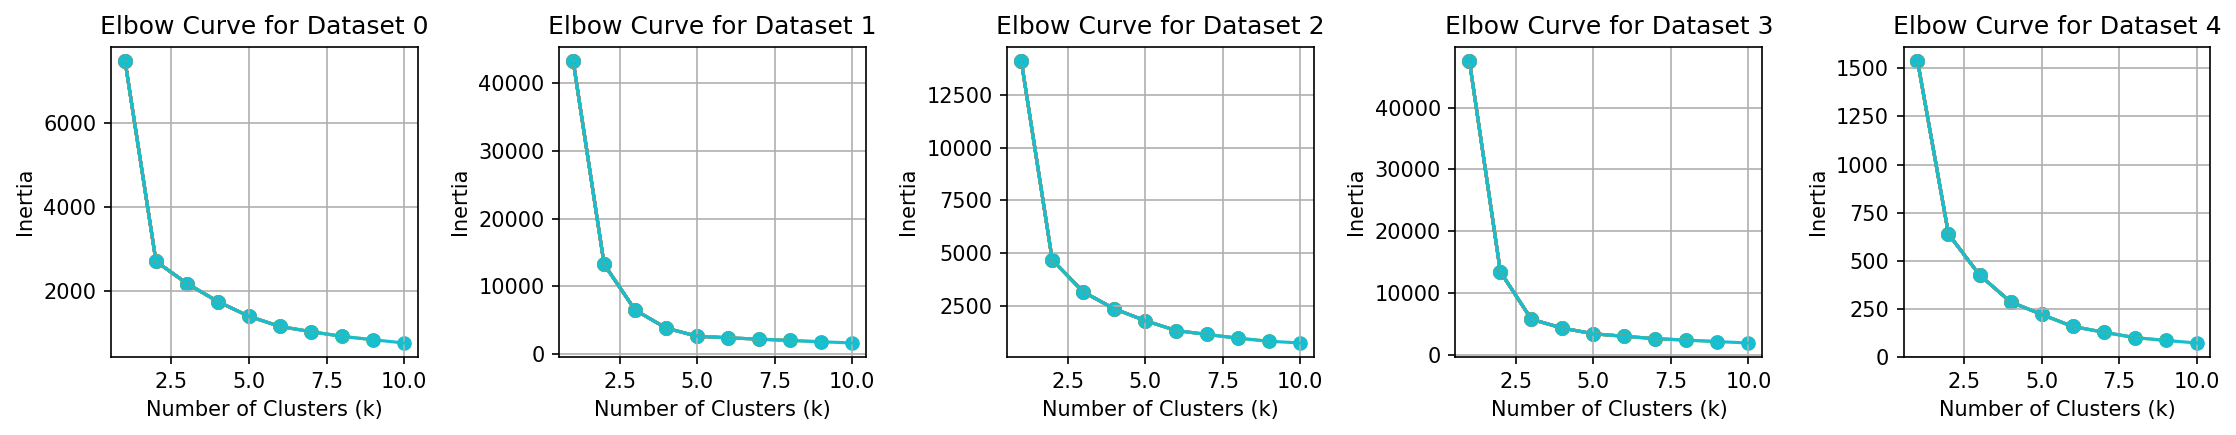

In [8]:
from sklearn.cluster import KMeans
import seaborn as sns
import warnings


# Ignore all warnings
warnings.filterwarnings('ignore')

fig, axs = plt.subplots(1, len(X), figsize=(len(X)*3, 3))

# Loop over datasets:
for i in range(len(X)):
    dataset = X[i]

    # Initialize empty lists to store inertia and k values:
    inertia = []
    k_values = []

    # Loop over values of k:
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(dataset)
        inertia.append(kmeans.inertia_)
        k_values.append(k)

            # Plot the elbow curve:
        axs[i].plot(k_values, inertia)
        axs[i].scatter(k_values, inertia)
        axs[i].grid(True)
        axs[i].set_title(f"Elbow Curve for Dataset {i}")
        axs[i].set_xlabel("Number of Clusters (k)")
        axs[i].set_ylabel("Inertia")
        

# Add a grid to the plot:
plt.grid(True)
    
plt.tight_layout()
plt.show()

We find elbow points by finding the point where the rate of the decreasing interia first begins to slow significatly.
- For dataset 0 it looks like the elbow point is at k = 2
- For dataset 1 it looks like the elbow point is at k = 3 
- For dataset 2 it looks like the elbow point is at k = 3 or k = 4
- For dataset 3 it looks like the elbow point is at k = 3 
- For dataset 4 it looks like the elbow point is at k = 3 

The elbow points tell us the approximate optimal amount of clusters in a dataset. 

When we compare these numbers to the plots of the features for the datasets, the quantity of clusters may look different. 

- For dataset 0, k = 2 looks correct 
- For dataset 1, it looks more like there's 4 clusters instead of 3 
- For dataset 2, k = 3 looks more correct than 4
- For dataset 3, k = 3 looks correct 
- For dataset 4, visually inspecting definitely leads one to believe that k = 2 instead of k = 3.  

Below this paragraph is summarized tabularly. 


|  Dataset | k from Elbow Curve | k from Dataset Graph | Using Moving Forward 
| --- | ---- | ---- | ---- |
|  0   |   2   | 2  | 2 |
|   1   |       3 | 4   | 3| 
|   2   |   3 or 4    |    3   | 3 |
|   3   |   3   |    3   | 3 | 
|   4   |   3    |    2   | 2 |



For the k-values that are inconsistent between the plot of the data and the plot of the elbow curve, I'm deciding which k to use by balancing the elbow curve and the dataset graph. For the second dataset (dataset 1), it's not immediately obvious whether there are 3 or 4 clusters in the plot, so I'm going to trust what the analysis has shown over my eyes. 

For the fifth dataset (dataset 4), it is very clear that there are two clusters, so I will be using k = 2 for this one


- Plot your clustered data (different color for each cluster assignment) for your best $k$-means fit determined from both the elbow curve and your judgment for each dataset and your inspection of the dataset.

In [10]:
# Ignore the "font not found" warning
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

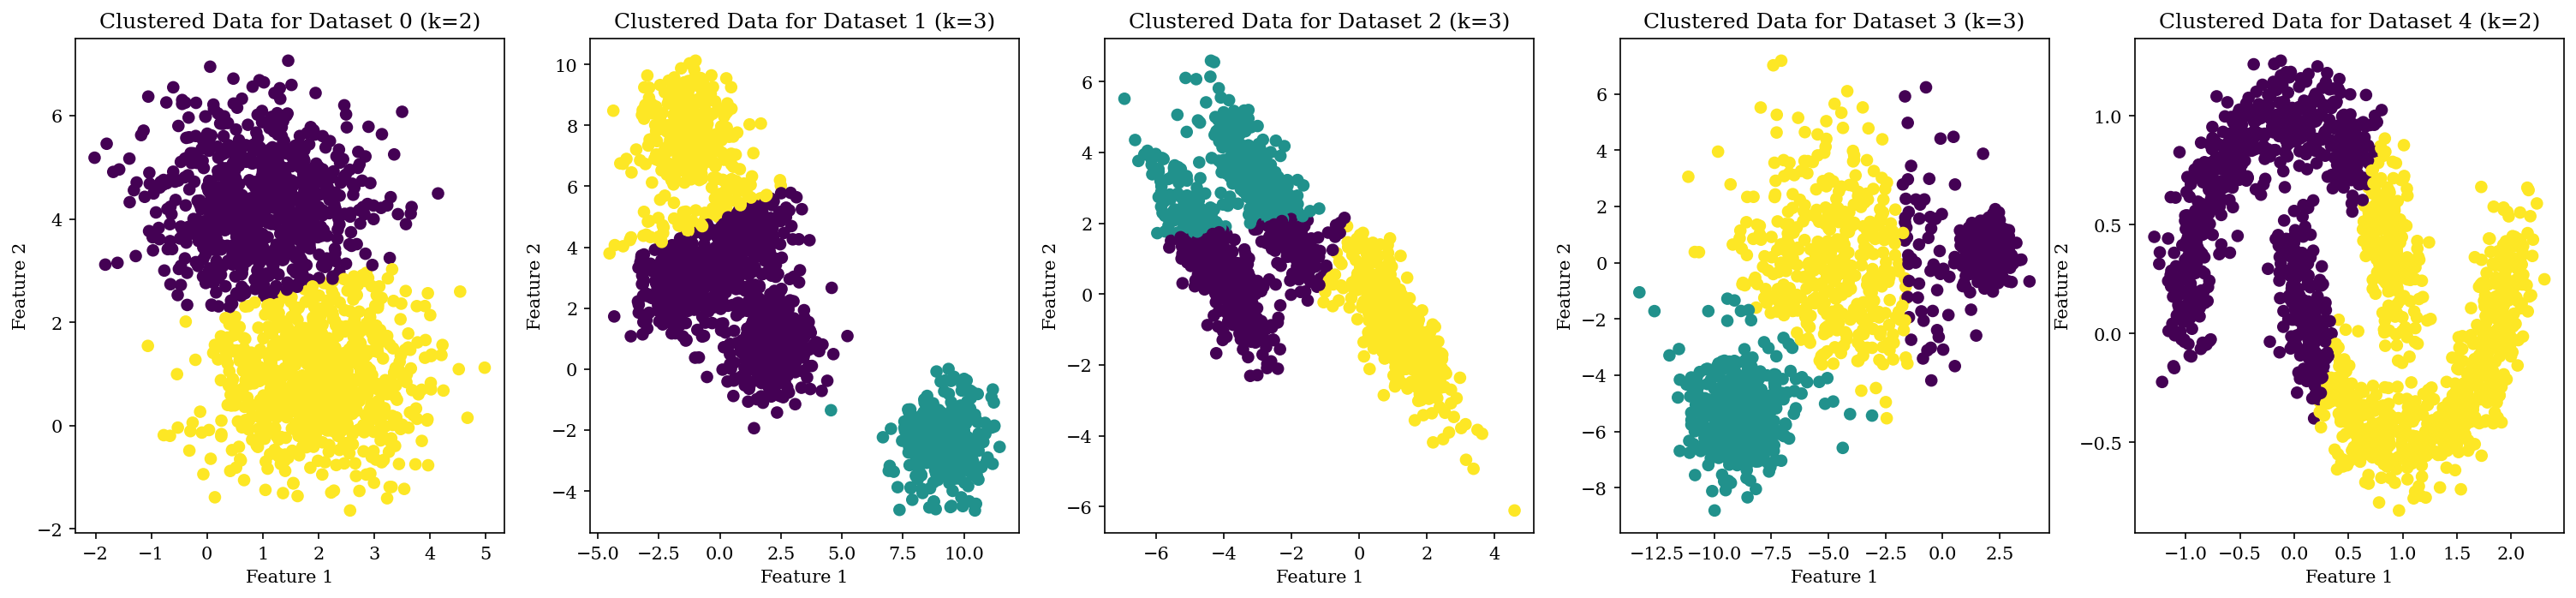

In [15]:
# Ignore the "font not found" warning
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# Set the font to use for all Matplotlib text
plt.rcParams['font.family'] = 'serif'

best_k = [2, 3, 3, 3, 2]

fig, axs = plt.subplots(nrows=1, ncols=len(X), figsize=(25, 5))

# Loop over the datasets:
for i in range(len(X)):
    dataset = X[i]
    k = best_k[i]

    # Fit a k-means model with the best k value
    kmeans = KMeans(n_clusters=k, random_state=0).fit(dataset)

    # Plot the data with different colors for each cluster assignment
    axs[i].scatter(dataset[:, 0], dataset[:, 1], c=kmeans.labels_, cmap='viridis')
    axs[i].set_title(f"Clustered Data for Dataset {i} (k={k})")
    axs[i].set_xlabel('Feature 1')
    axs[i].set_ylabel('Feature 2')


plt.show()

**(b) Apply DBSCAN**. Vary the `eps` and `min_samples` parameters to get as close as you can to having the same number of clusters as your choices with K-means. In this case, the black points are points that were not assigned to clusters.

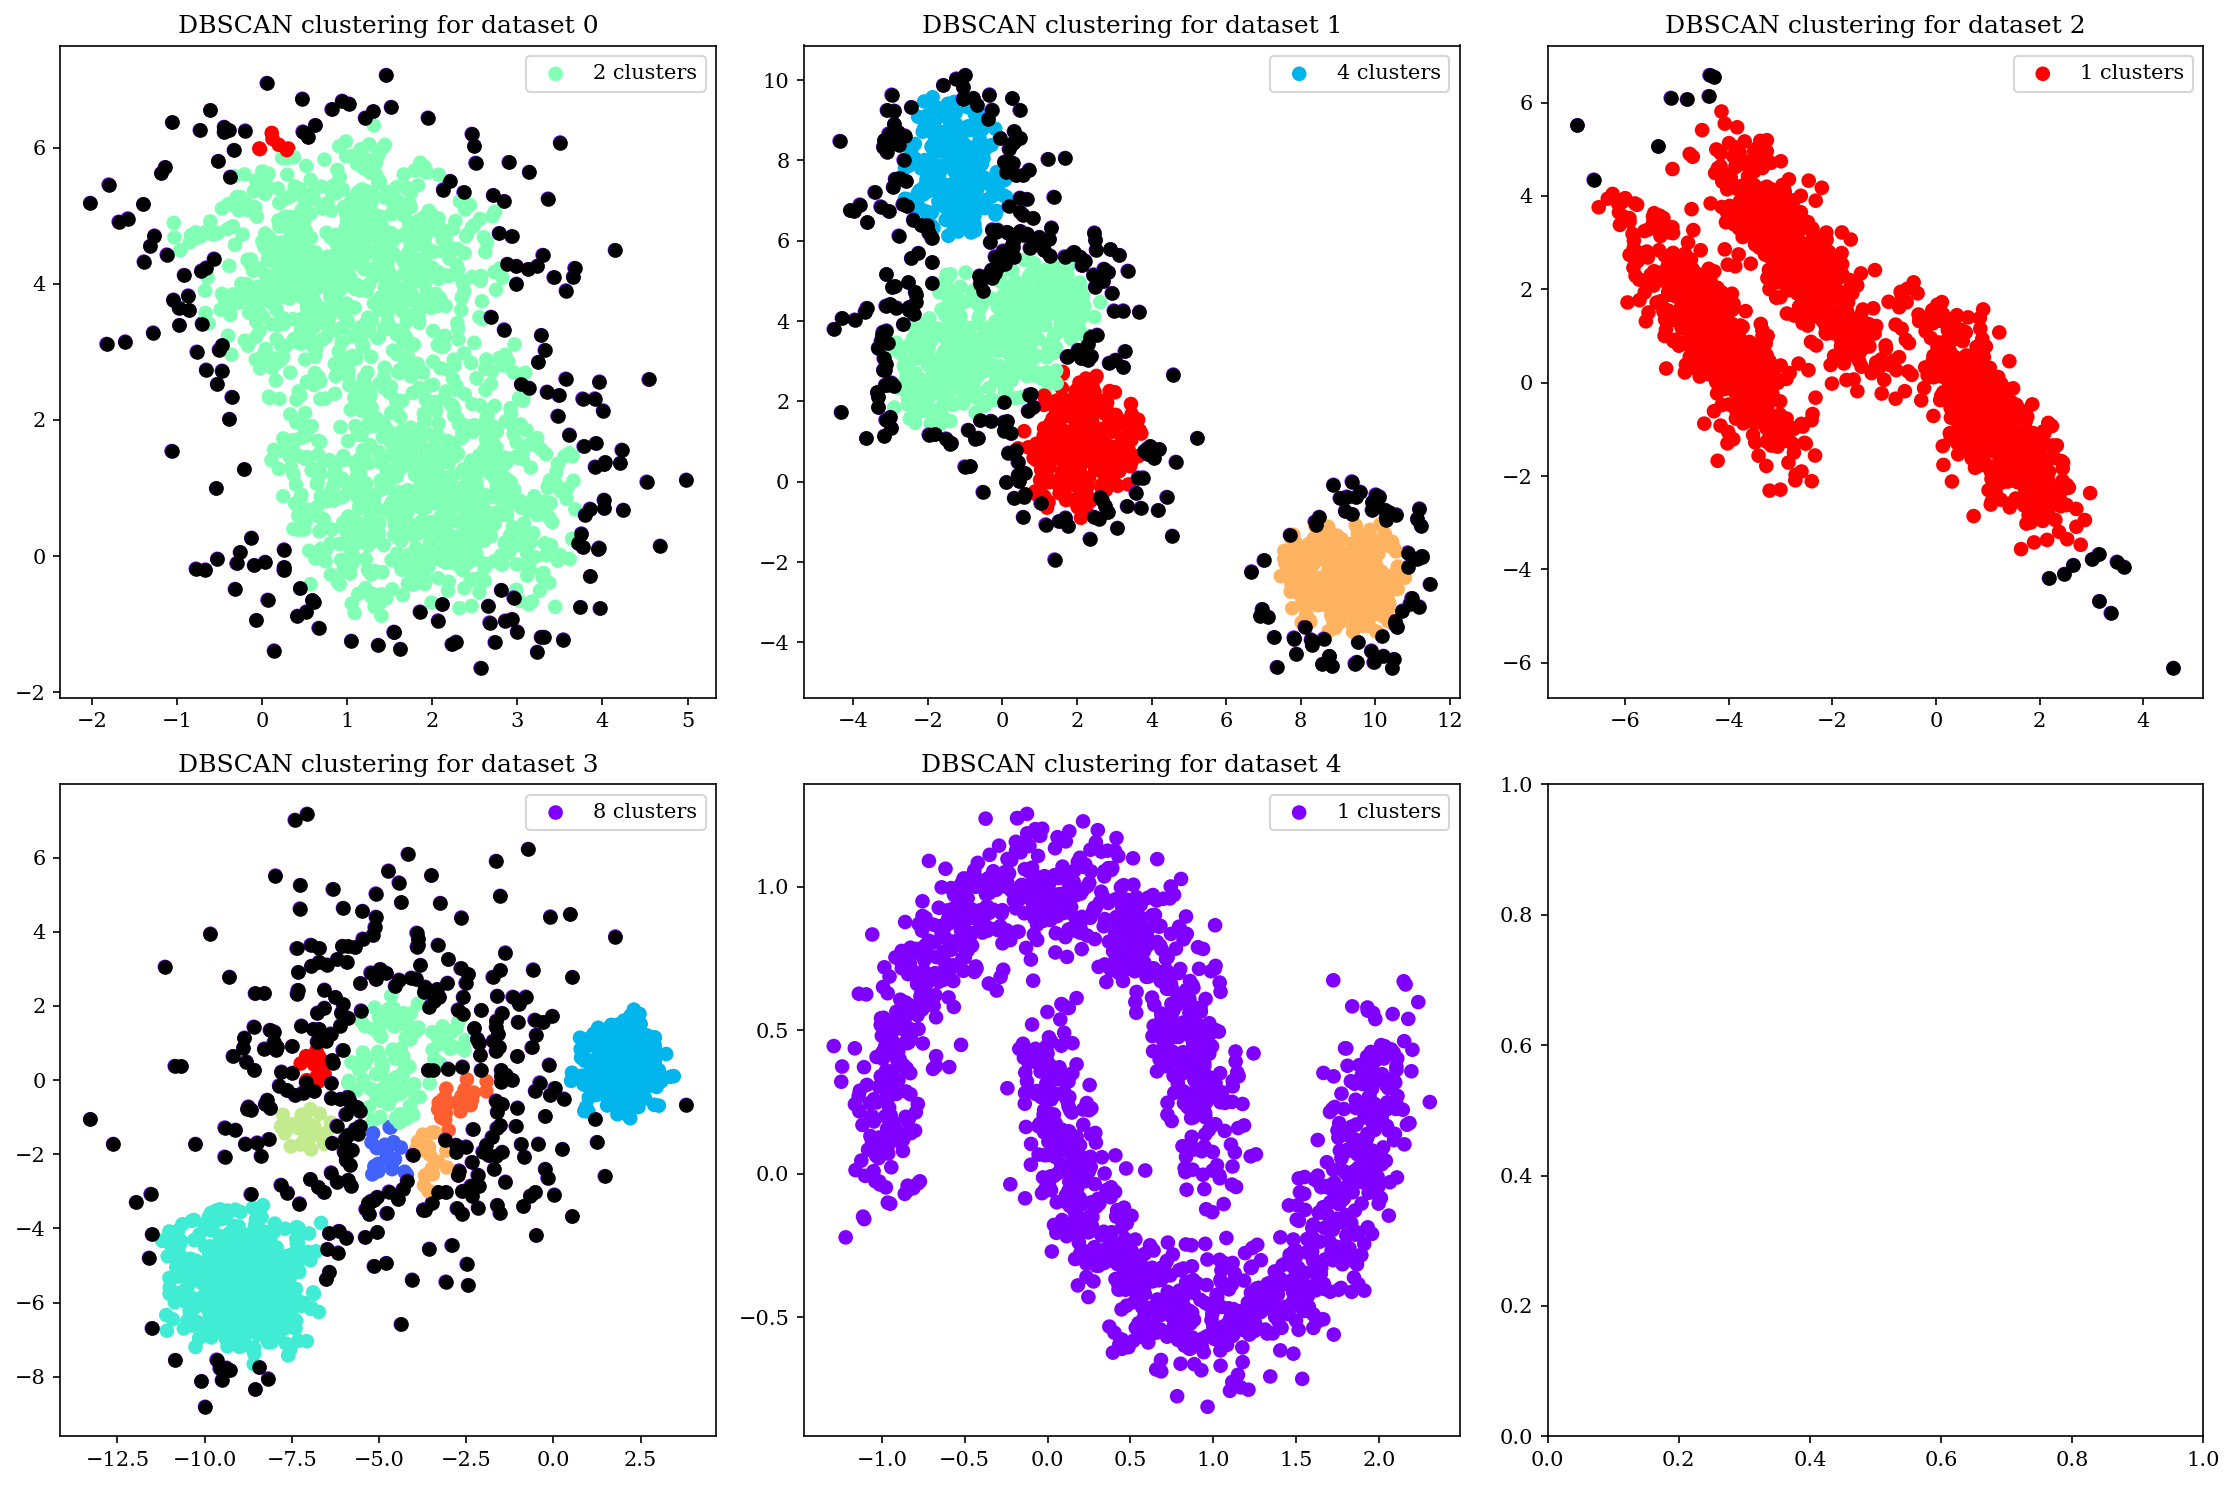

In [33]:
from sklearn.cluster import DBSCAN

# Set the parameters
eps_list = [0.3, 0.5, 1.0, 0.5, 0.2] # vary the eps parameter for each dataset
min_samples_list = [10, 20, 50, 10, 10] # vary the min_samples parameter for each dataset

# Create a figure with subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Apply DBSCAN to each dataset and plot the results
for i in range(len(X)):
    # Fit the model
    dbscan = DBSCAN(eps=eps_list[i], min_samples=min_samples_list[i])
    dbscan.fit(X[i])
    labels = dbscan.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0) # count the number of clusters (excluding noise points)
    
    # Plot the results
    if i < 3:
        axs[0, i].scatter(X[i][:,0], X[i][:,1], c=labels, cmap='rainbow')
        axs[0, i].scatter(X[i][labels==-1][:,0], X[i][labels==-1][:,1], c='black')
        axs[0, i].set_title(f"DBSCAN clustering for dataset {i}")
        axs[0, i].legend([f"{n_clusters} clusters"])
    else:
        axs[1, i-3].scatter(X[i][:,0], X[i][:,1], c=labels, cmap='rainbow')
        axs[1, i-3].scatter(X[i][labels==-1][:,0], X[i][labels==-1][:,1], c='black')
        axs[1, i-3].set_title(f"DBSCAN clustering for dataset {i}")
        axs[1, i-3].legend([f"{n_clusters} clusters"])

# Adjust the spacing between subplots and display the plot
fig.tight_layout()
plt.show()


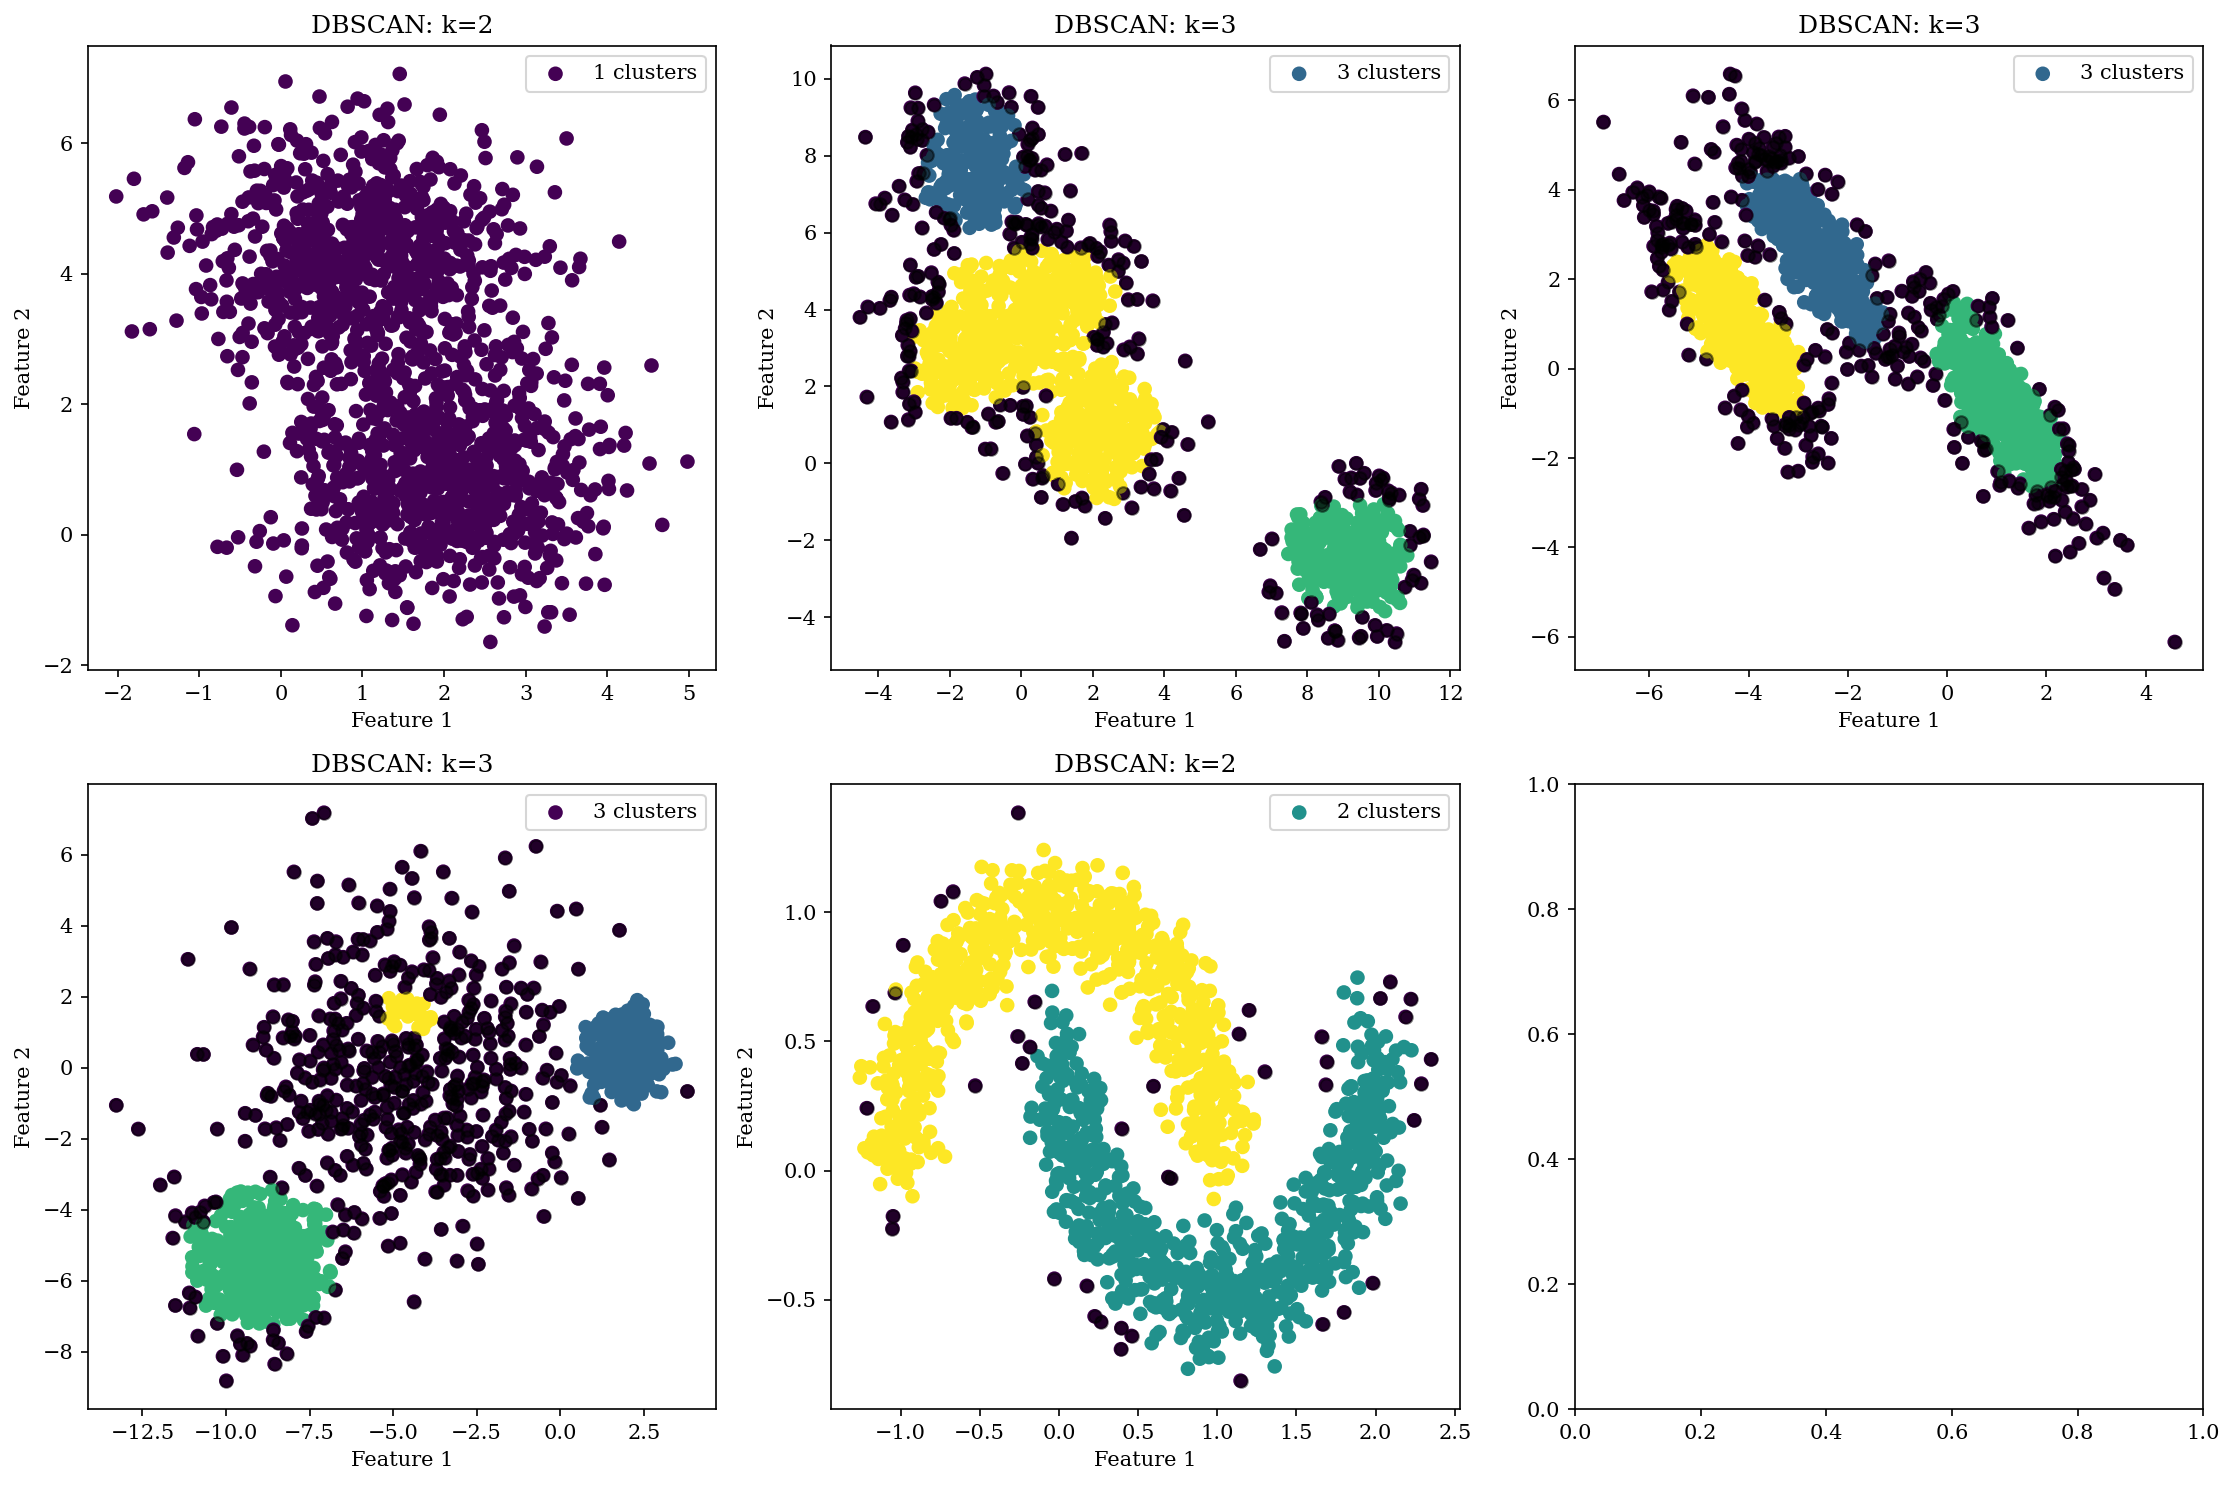

In [67]:
from sklearn.cluster import DBSCAN

# Set the desired number of clusters
k = [2, 3, 3, 3, 2]

# Create a figure with subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Set the parameter values to use
eps_list = [0.3, 0.5, 0.7, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 1] # Set the eps values to try
min_samples_list = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] # Set the min_samples values to try

# Tune the parameters and plot the results
for i in range(len(X)):
    # Set the initial values for eps and min_samples
    eps = eps_list[0]
    min_samples = min_samples_list[0]
    
    # Fit the model with the initial values
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(X[i])
    labels = dbscan.labels_
    
    # Check if the number of clusters is as desired
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    while n_clusters != k[i]:
        # If not, try increasing eps or min_samples
        if n_clusters < k[i]:
            if eps < eps_list[-1]:
                eps = eps_list[eps_list.index(eps) + 1]
            else:
                min_samples = min_samples_list[min_samples_list.index(min_samples) + 1]
        elif n_clusters > k[i]:
            if min_samples < min_samples_list[-1]:
                min_samples = min_samples_list[min_samples_list.index(min_samples) + 1]
            else:
                eps = eps_list[eps_list.index(eps) + 1]
        
        # Fit the model with the updated values
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X[i])
        labels = dbscan.labels_
        
        # Check the number of clusters again
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        
        # Stop if we've gone through all the parameter values without finding the desired number of clusters
        if eps == eps_list[-1] and min_samples == min_samples_list[-1]:
            break
    
    # Plot the results
    axs[i//3, i%3].scatter(X[i][:, 0], X[i][:, 1], c=labels, cmap='viridis')
    axs[i//3, i%3].scatter(X[i][labels==-1, 0], X[i][labels==-1, 1], c='k', alpha=0.5)
    axs[i//3, i%3].set_title(f"DBSCAN: k={k[i]}")
    axs[i//3, i%3].legend([f"{n_clusters} clusters"])
    axs[i//3, i%3].set_ylabel('Feature 2')
    axs[i//3, i%3].set_xlabel('Feature 1')
plt.tight_layout()
plt.show()


## Tuning dataset 0 by itself

In [48]:
from sklearn.cluster import DBSCAN

X = X[0] # Your data
eps_list = [0.3, 0.5, 0.7, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 1] # Set the eps values to try
min_samples_list = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] # Set the min_samples values to try

n_clusters = -1  # Start with an arbitrary value for n_clusters
i = 0

while n_clusters != 2 and i < len(eps_list) * len(min_samples_list):
    eps = eps_list[i % len(eps_list)]
    min_samples = min_samples_list[i % len(min_samples_list)]
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(X)
    labels = dbscan.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    i += 1

# Do something with the results, e.g. print them
if n_clusters == 2:
    print(f"Found 2 clusters with eps={eps} and min_samples={min_samples}")
else:
    print("Could not find 2 clusters")


Found 2 clusters with eps=0.3 and min_samples=10


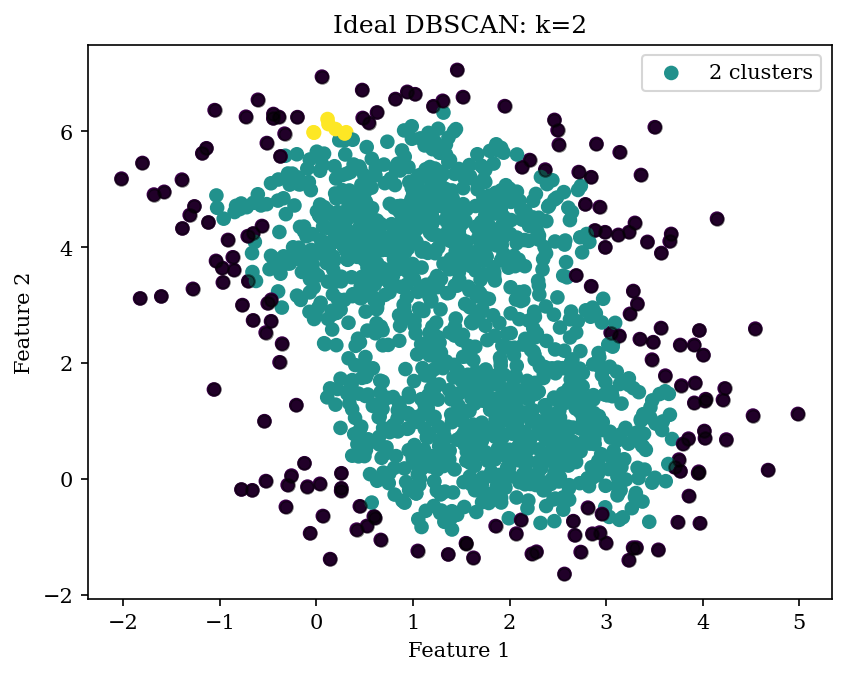

In [66]:
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan.fit(X[0])
labels = dbscan.labels_
        
# Check the number of clusters again
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        
# Plot the results
plt.scatter(X[0][:, 0], X[0][:, 1], c=labels, cmap='viridis')
plt.scatter(X[0][labels==-1, 0], X[0][labels==-1, 1], c='k', alpha=0.5)
plt.title(f"Ideal DBSCAN: k=2")
plt.legend([f"{n_clusters} clusters"])
plt.ylabel('Feature 2')
plt.xlabel('Feature 1')
plt.show()


**(c) Apply Spectral Clustering**. Select the same number of clusters as selected by k-means.

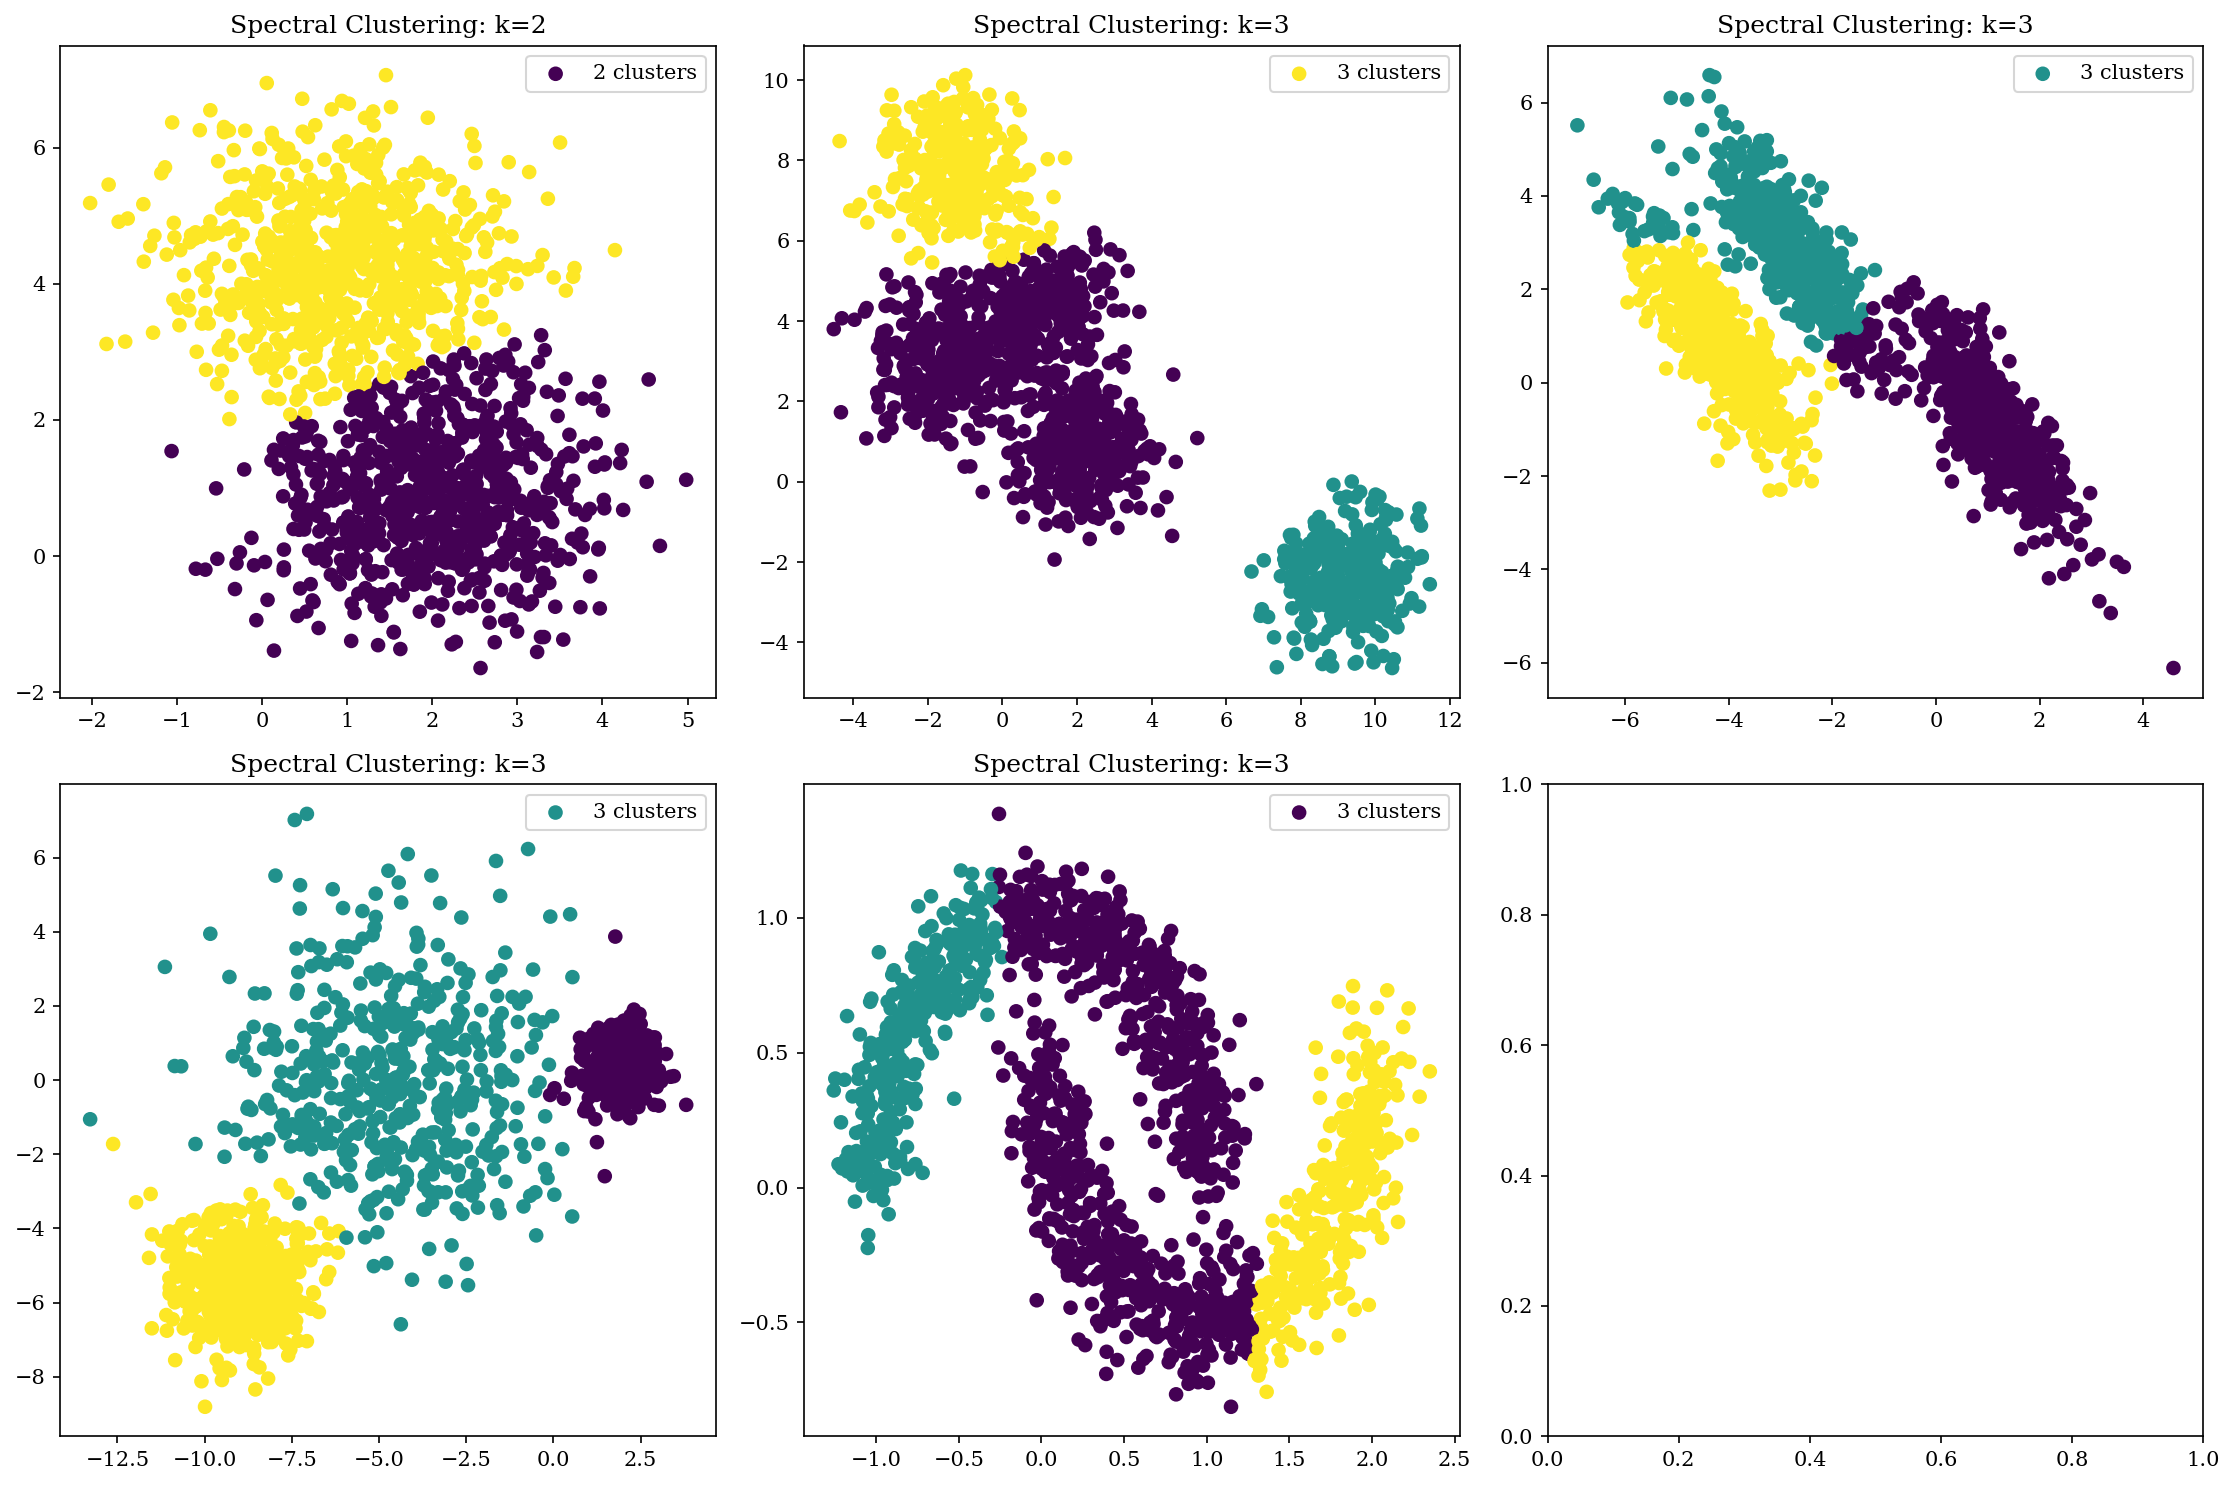

In [70]:
from sklearn.cluster import SpectralClustering

# Set the desired number of clusters
k = [2, 3, 3, 3, 3]

# Create a figure with subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Tune the parameters and plot the results
for i in range(len(X)):
    # Fit the model and get the cluster assignments
    sc = SpectralClustering(n_clusters=k[i], affinity='nearest_neighbors')
    labels = sc.fit_predict(X[i])
    
    # Plot the results
    axs[i//3, i%3].scatter(X[i][:, 0], X[i][:, 1], c=labels, cmap='viridis')
    axs[i//3, i%3].set_title(f"Spectral Clustering: k={k[i]}")
    axs[i//3, i%3].legend([f"{k[i]} clusters"])
plt.tight_layout()
plt.show()


**(d) Comment on the strengths and weaknesses of each approach**. In particular, mention: 
- Which technique worked "best" and "worst" (as defined by matching how human intuition would cluster the data) on each dataset?
- How much effort was required to get good clustering for each method (how much parameter tuning needed to be done)?

# 3

## [25 points] Dimensionality reduction and visualization of digits with PCA and t-SNE

**(a)** Reduce the dimensionality of the data with PCA for data visualization. Load the `scikit-learn` digits dataset (code provided to do this below). Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the data with labels in this two dimensional space (labels can be colors, shapes, or using the actual numbers to represent the data - definitely include a legend in your plot).

**(b)** Create a plot showing the cumulative fraction of variance explained as you incorporate from $1$ through all $D$ principal components of the data (where $D$ is the dimensionality of the data). 
- What fraction of variance in the data is UNEXPLAINED by the first two principal components of the data? 
- Briefly comment on how this may impact how well-clustered the data are. 
*You can use the `explained_variance_` attribute of the PCA module in `scikit-learn` to assist with this question*

**(c)** Reduce the dimensionality of the data with t-SNE for data visualization. T-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE using the `scikit-learn` implementation to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/).

**(d)** Briefy compare/contrast the performance of these two techniques. 
- Which seemed to cluster the data best and why?
- Notice that while t-SNE has a `fit` method and a `fit_transform` method, these methods are actually identical, and there is no `transform` method. Why is this? What implications does this imply for using this method?

*Note: Remember that you typically will not have labels available in most problems.*

Code is provided for loading the data below.

In [71]:
################################
# Load the data
################################
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# load dataset
digits = datasets.load_digits()
n_sample = digits.target.shape[0]
n_feature = digits.images.shape[1] * digits.images.shape[2]
X_digits = np.zeros((n_sample, n_feature))
for i in range(n_sample):
    X_digits[i, :] = digits.images[i, :, :].flatten()
y_digits = digits.target

**(a)** Reduce the dimensionality of the data with PCA for data visualization. Load the `scikit-learn` digits dataset (code provided to do this below). Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the data with labels in this two dimensional space (labels can be colors, shapes, or using the actual numbers to represent the data - definitely include a legend in your plot).

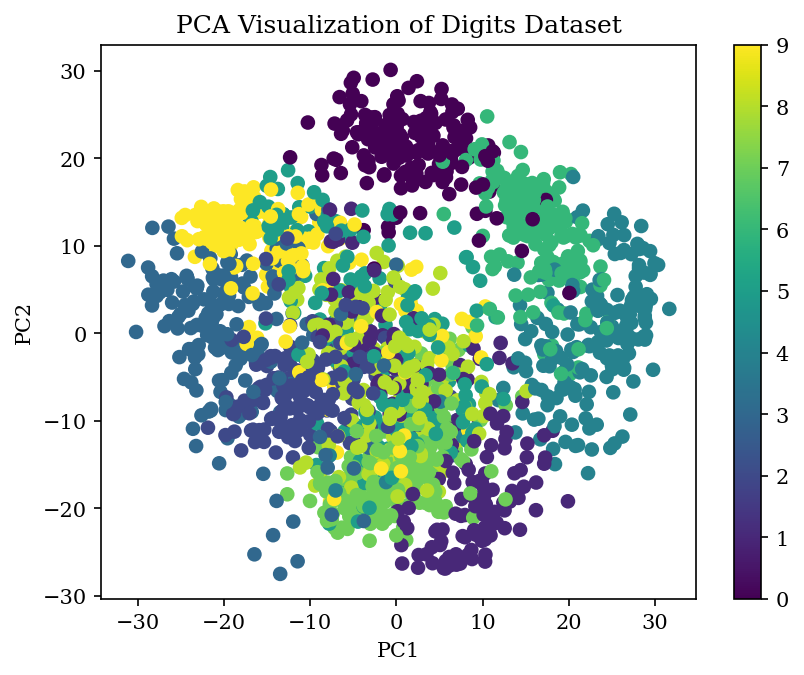

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

# Perform PCA and reduce to 2 dimensions
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_digits)

# Create scatter plot
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_digits)
plt.colorbar()

# Add axis labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization of Digits Dataset')

# Show the plot
plt.show()

**(b)** Create a plot showing the cumulative fraction of variance explained as you incorporate from $1$ through all $D$ principal components of the data (where $D$ is the dimensionality of the data). 
- What fraction of variance in the data is UNEXPLAINED by the first two principal components of the data? 
- Briefly comment on how this may impact how well-clustered the data are. 
*You can use the `explained_variance_` attribute of the PCA module in `scikit-learn` to assist with this question*

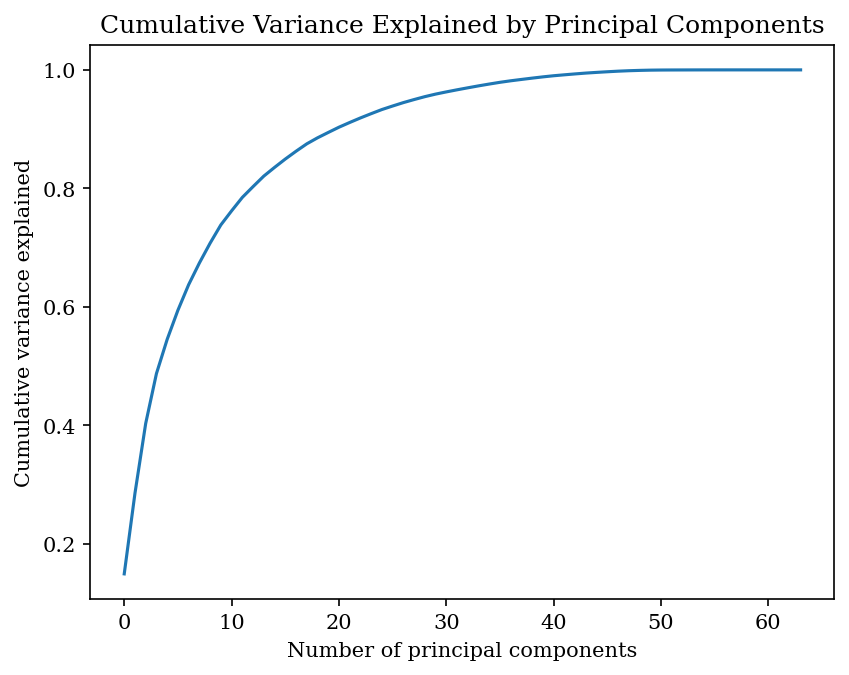

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

# Perform PCA and calculate cumulative variance
pca = PCA()
pca.fit(X_digits)
variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance)

# Create plot
plt.plot(cumulative_variance)
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative variance explained')
plt.title('Cumulative Variance Explained by Principal Components')

# Show the plot
plt.show()


**(c)** Reduce the dimensionality of the data with t-SNE for data visualization. T-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE using the `scikit-learn` implementation to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/).

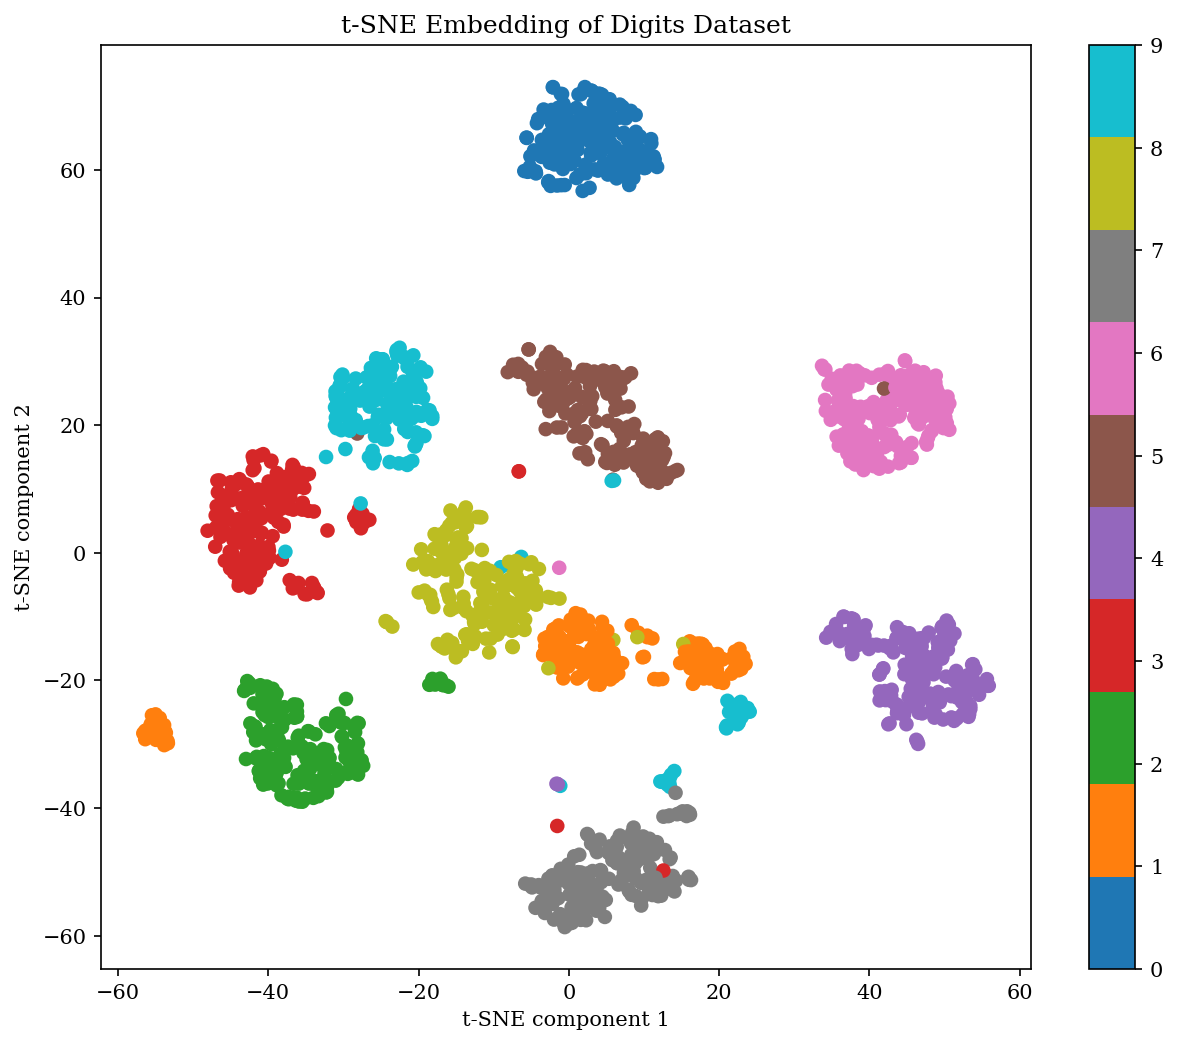

In [74]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_digits)

# Create plot
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_digits, cmap=plt.cm.get_cmap('tab10', 10))
plt.colorbar(ticks=range(10))
plt.title('t-SNE Embedding of Digits Dataset')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()

**(d)** Briefy compare/contrast the performance of these two techniques. 
- Which seemed to cluster the data best and why?
- Notice that while t-SNE has a `fit` method and a `fit_transform` method, these methods are actually identical, and there is no `transform` method. Why is this? What implications does this imply for using this method?